## Титаник 

##### Задача: 

Обучить модель определять, кто из пассажиров Титаника выживет после крушения корабля

На выходе необходимо получить список пассажиров с разметкой выживших/не выживших

##### Описание данных

* survival - Survival
* pclass - Ticket class
* sex - Sex
* Age - Age in years
* sibsp - # of siblings / spouses aboard the Titanic
* parch - # of parents / children aboard the Titanic
* ticket - Ticket number
* fare - Passenger fare
* cabin - Cabin number
* embarked - Port of Embarkation

Для начала необходимо установить зависимости

In [1]:
pip install -r requirements.txt

Note: you may need to restart the kernel to use updated packages.


## Импорт модулей

In [94]:
import pandas as pd
import numpy as np
from numpy.linalg import inv, matrix_power
from linear_regression import LinearRegression
from linear_classification import LinearClassification
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Чтение данных

In [3]:
df_train = pd.read_csv('train.csv', index_col=0)
df_test = pd.read_csv('test.csv', index_col=0)

## Анализ и предобработка данных

In [4]:
df_train.shape

(891, 11)

In [5]:
df_train.sample(7)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
661,1,1,"Frauenthal, Dr. Henry William",male,50.0,2,0,PC 17611,133.6500,NaN,S
216,1,1,"Newell, Miss. Madeleine",female,31.0,1,0,35273,113.2750,D36,C
765,0,3,"Eklund, Mr. Hans Linus",male,16.0,0,0,347074,7.7750,NaN,S
298,0,1,"Allison, Miss. Helen Loraine",female,2.0,1,2,113781,151.5500,C22 C26,S
182,0,2,"Pernot, Mr. Rene",male,NaN,0,0,SC/PARIS 2131,15.0500,NaN,C
763,1,3,"Barah, Mr. Hanna Assi",male,20.0,0,0,2663,7.2292,NaN,C
510,1,3,"Lang, Mr. Fang",male,26.0,0,0,1601,56.4958,NaN,S


In [6]:
# Посмотрю на статистики

df_train.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
# Количество выживших
len(df_train.loc[df_train['Survived'] == 1])

342

In [8]:
# Количество не выживших
len(df_train.loc[df_train['Survived'] == 0])

549

In [9]:
df_train.duplicated().sum() # повторов нет

0

Посмотрю на пропуски в данных и обработаю их

In [10]:
df_train.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [11]:
df_train.Cabin.unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [12]:
df_train[~df_train.Cabin.isnull()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
...,...,...,...,...,...,...,...,...,...,...,...
872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S
873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S
880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C


In [13]:
# Имеет смысл сохранить фичу, так как много выживших
len(df_train[~df_train.Cabin.isnull()].loc[df_train[~df_train.Cabin.isnull()]['Survived'] == 1])

136

In [14]:
# Однако не выживших тоже достаточно много. Принимаю решение дропнуть
len(df_train[~df_train.Cabin.isnull()].loc[df_train[~df_train.Cabin.isnull()]['Survived'] == 0])

68

In [15]:
# С возрастом поступлю так: заменю на медиану по половому признаку, так как разброс широкий
mean_age_female = df_train[df_train.Sex == 'female']['Age'].median()
mean_age_male = df_train[df_train.Sex == 'male']['Age'].median()

df_train['Age'] = np.where(~df_train['Age'].isnull(), df_train['Age'], 
                           np.where(df_train.Sex == 'male', mean_age_male, mean_age_female))

In [16]:
df_train[['Survived', 'Embarked']].groupby('Embarked').sum('Survived')

,Survived
Embarked,
C,93
Q,30
S,217


In [17]:
df_train[df_train.Embarked.isnull()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [18]:
# Билет вряд ли поможет модели

df_train[['Name', 'Survived', 'Ticket']].groupby('Ticket').agg(['count', 'sum'])

Name                                                    Survived  \
            count                                                sum    count   
Ticket                                                                          
110152          3  Cherry, Miss. GladysMaioni, Miss. RobertaRothe...        3   
110413          3  Taussig, Mr. EmilTaussig, Mrs. Emil (Tillie Ma...        3   
110465          2  Porter, Mr. Walter ChamberlainClifford, Mr. Ge...        2   
110564          1          Bjornstrom-Steffansson, Mr. Mauritz Hakan        1   
110813          1   Warren, Mrs. Frank Manley (Anna Sophia Atkinson)        1   
...           ...                                                ...      ...   
W./C. 6608      4  Ford, Mr. William NealFord, Miss. Robina Maggi...        4   
W./C. 6609      1                       Harknett, Miss. Alice Phoebe        1   
W.E.P. 5734     1                        Chaffee, Mr. Herbert Fuller        1   
W/C 14208       1                                 Harris, Mr. Walter        1   
WE/P 5735       2  Crosby, Miss. Harriet RCrosby, Capt. Edward Gi...        2   

                 
            sum  
Ticket           
110152        3  
110413        2  
110465        0  
110564        1  
110813        1  
...          ..  
W./C. 6608    0  
W./C. 6609    0  
W.E.P. 5734   0  
W/C 14208     0  
WE/P 5735     1  

[681 rows x 4 columns]

In [19]:
# Обе выжили, так что определим значения переменных тем, в котором выжило больше всего людей

df_train['Embarked'] = np.where(~df_train['Embarked'].isnull(), df_train['Embarked'], 'S')

In [20]:
# Удалю ненужное
df_train.drop(['Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

In [21]:
# Из тестовой выборки тоже
df_test.drop(['Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

In [22]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 62.6+ KB


In [23]:
df_train['Sex'] = np.where(df_train['Sex']=='male', 1, 0)

In [24]:
df_test['Sex'] = np.where(df_test['Sex']=='male', 1, 0)

In [25]:
# one-hot
df_train = pd.get_dummies(df_train)
df_test = pd.get_dummies(df_test)

In [26]:
df_train.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked_C', 'Embarked_Q', 'Embarked_S'],
      dtype='object')

In [27]:
df_test.columns

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked_C',
       'Embarked_Q', 'Embarked_S'],
      dtype='object')

## Обработка фич



In [28]:
# Признаки и таргет
train_data = df_train.drop('Survived', 1)
train_labels = df_train['Survived']

test_data = df_test
test_labels = pd.read_csv('gender_submission.csv', index_col=0)

<ipython-input-28-f31c8be2d56b>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  train_data = df_train.drop('Survived', 1)


Соотношение классов

In [29]:
print('df_train = 1: {:.2f} \ndf_train = 0: {:.2f}'.format(sum(train_labels)/float(len(train_labels)), 
                                                        1.0 - sum(train_labels)/float(len(train_labels))))

df_train = 1: 0.38 
df_train = 0: 0.62


Теперь посмотрим на баланс соотношения данных в трейновой и тестовой выборках

Text(0.5, 1.0, 'Test data')

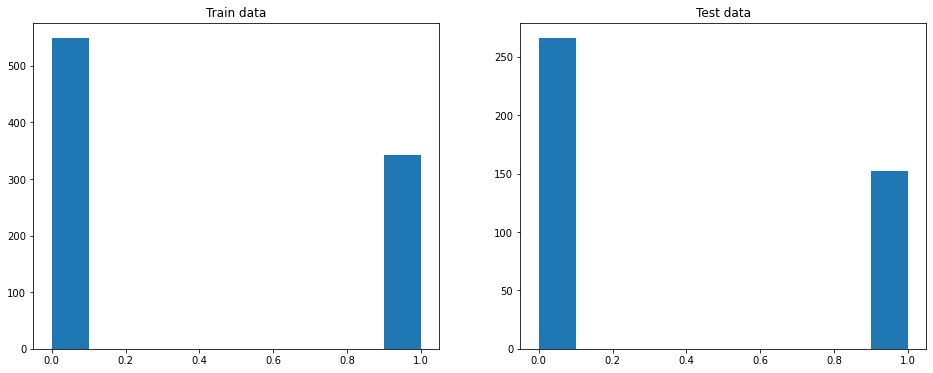

In [30]:
pylab.figure(figsize = (16, 6))

pylab.subplot(1,2,1)
pylab.hist(train_labels)
pylab.title('Train data')

pylab.subplot(1,2,2)
pylab.hist(test_labels)
pylab.title('Test data')

In [31]:
def correlated_features(data, stop=0.75):
    correlation_matrix = data.corr()
    correlated_features = set() 
    for i in range(len(correlation_matrix.columns)):
        cor_pares=[]
        for j in range(i): 
            if abs(correlation_matrix.iloc[i, j]) > stop:
                cor_pares = (correlation_matrix.columns[i], correlation_matrix.index[j], abs(correlation_matrix.iloc[i, j]))
                correlated_features.add(cor_pares)
    return correlated_features

In [32]:
def drop_cor_features(data, correlated_features):
    for features in correlated_features:
        try:
            data.drop(features[0], axis=1, inplace=True)
        except:
            continue

In [33]:
corr_features = correlated_features(train_data,  stop=0.5)

In [34]:
corr_features # уберем, пожалуй

{('Embarked_S', 'Embarked_C', 0.7827421287187312),
 ('Fare', 'Pclass', 0.5494996199439076)}

In [35]:
drop_cor_features(train_data, corr_features) 
drop_cor_features(test_data, corr_features) #Из теста также удаляем, чтобы избежать ошибки размерности

In [36]:
train_data.shape

(891, 7)

In [37]:
test_data.shape

(418, 7)

In [38]:
len(correlated_features(train_data)) == 0

True

### Дальше - выбросы, их удаление позволит чувствительным к ним алгоритмам показать лучший результат

In [39]:
df_train = train_data 

df_train['Survived'] = train_labels

<AxesSubplot:>

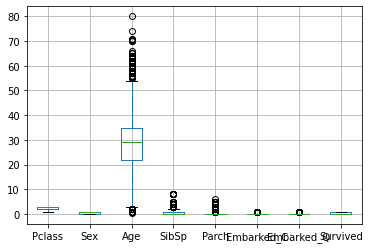

In [40]:
df_train.boxplot()

Для оценки выбросов попробую использовать Z-score и One Class SVM

1.   Z-score - это статистическая мера, которая показывает, насколько каждая точка удалена (в std) от среднего значения



In [41]:
z = np.abs(stats.zscore(df_train.drop('Survived', 1)))
threshold = 6
train_data_z = df_train[(z < threshold).all(axis=1)]

<ipython-input-41-3a2e363fc3ce>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  z = np.abs(stats.zscore(df_train.drop('Survived', 1)))


In [42]:
train_data_z.shape # удалили 1% строк обучающей выборки

(883, 8)

Проверим наличие выбросов после применения метода

<ipython-input-43-da5e0c9dac21>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  train_data_z.drop('Survived', 1).boxplot()


<AxesSubplot:>

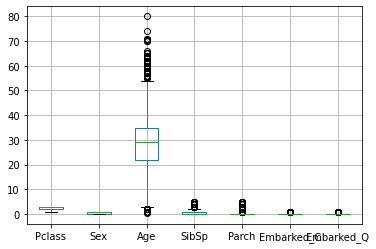

In [43]:
train_data_z.drop('Survived', 1).boxplot() 

OC SVM - это вариант классической модели SVM, только для классификации одного класса, использующийся для определения выбросов и аномалий

In [44]:
df_train = train_data_z

In [45]:
train_data = df_train.drop('Survived', 1)
train_labels = df_train['Survived']

<ipython-input-45-c477f5d40d24>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  train_data = df_train.drop('Survived', 1)


In [46]:
train_data.shape

(883, 7)

In [47]:
train_labels.shape

(883,)

## Machine Learning

Функция вычисления метрик

In [48]:
from sklearn.metrics import precision_score, f1_score, accuracy_score, recall_score

In [72]:
# Метрики оценки качества моделей
metrics = {'F1_Score':f1_score, 'Precision': precision_score, 'Recall': recall_score, 'Accuracy': accuracy_score}

In [78]:
def calculate_metrics(test_labels, predict_labels, metrics={}):
    if len(metrics) == 0:
        raise ValueError('metrics are empty')
        
    results = dict()
    for key in metrics:
        results[key] = metrics[key](test_labels, predict_labels)
    
    return results

In [79]:
start_time = time.time()

In [104]:
bred = LinearClassification(train_data.values, train_labels.values.reshape(train_data.shape[0], 1))
bred_test = LinearClassification(test_data.values, test_labels.values.reshape(test_data.shape[0], 1))

In [105]:
w = bred.logistic_regression(a=0.37142857142857144, iter_cnt=10000)

In [106]:
y_bred = bred_test.predict(w[0], w[1])

In [107]:
print("--- %s seconds ---" % (time.time() - start_time))

--- 975.9817569255829 seconds ---


In [108]:
def get_conf_matrix(Y_test, Y_pred):
    
    cnf_matrix = confusion_matrix(Y_test, Y_pred)
    class_names=[0,1] # name  of classes
    fig, ax = plt.subplots()
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names)
    plt.yticks(tick_marks, class_names)
    # create heatmap
    sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
    ax.xaxis.set_label_position("top")
    plt.tight_layout()
    plt.title('Confusion matrix', y=1.1)
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')

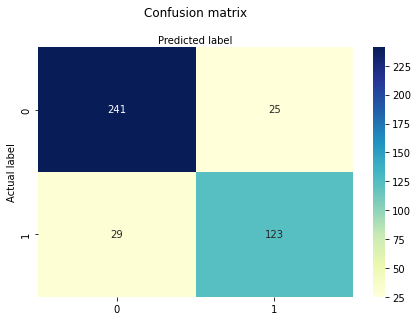

In [109]:
get_conf_matrix(test_labels, y_bred)

$\large accuracy = \frac{TP + TN}{TP + TN + FP + FN}$    
$\large precision = \frac{TP}{TP + FP}$    
$\large recall = \frac{TP}{TP + FN}$    

In [110]:
calculate_metrics(test_labels, y_bred, metrics=metrics)

{'F1_Score': 0.82,
 'Precision': 0.831081081081081,
 'Recall': 0.8092105263157895,
 'Accuracy': 0.8708133971291866}

In [111]:
w = bred.logistic_regression(a=0.45, iter_cnt=5000)

In [112]:
y_bred = bred_test.predict(w[0], w[1])

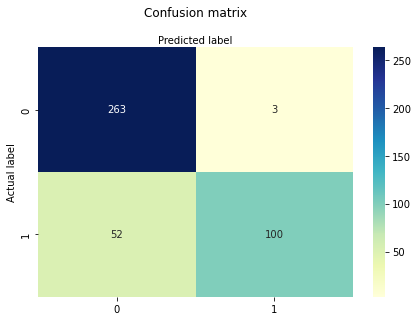

In [113]:
get_conf_matrix(test_labels, y_bred)

In [114]:
calculate_metrics(test_labels, y_bred, metrics=metrics)

{'F1_Score': 0.7843137254901962,
 'Precision': 0.970873786407767,
 'Recall': 0.6578947368421053,
 'Accuracy': 0.868421052631579}

In [90]:
for i in np.linspace(0.05, 0.5, 10):
    w = bred.logistic_regression(a=i, iter_cnt=5000)
    y_bred = bred_test.predict(w[0], w[1])
    print(i, calculate_metrics(test_labels, y_bred, metrics=metrics))

0.05 {'F1_Score': 0.7461538461538462, 'Precision': 0.8981481481481481, 'Recall': 0.6381578947368421, 'Accuracy': 0.8421052631578947}
0.1 {'F1_Score': 0.013071895424836602, 'Precision': 1.0, 'Recall': 0.006578947368421052, 'Accuracy': 0.638755980861244}
0.15000000000000002 {'F1_Score': 0.013071895424836602, 'Precision': 1.0, 'Recall': 0.006578947368421052, 'Accuracy': 0.638755980861244}
0.2 {'F1_Score': 0.7922077922077922, 'Precision': 0.782051282051282, 'Recall': 0.8026315789473685, 'Accuracy': 0.84688995215311}
0.25 {'F1_Score': 0.7922077922077922, 'Precision': 0.782051282051282, 'Recall': 0.8026315789473685, 'Accuracy': 0.84688995215311}
0.3 {'F1_Score': 0.5630630630630631, 'Precision': 0.4280821917808219, 'Recall': 0.8223684210526315, 'Accuracy': 0.5358851674641149}
0.35000000000000003 {'F1_Score': 0.013071895424836602, 'Precision': 1.0, 'Recall': 0.006578947368421052, 'Accuracy': 0.638755980861244}
0.4 {'F1_Score': 0.46464646464646464, 'Precision': 1.0, 'Recall': 0.3026315789473684